# Factor Analysis on K-Medoids clusters

In [59]:
import pandas as pd
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
import seaborn as sns
import matplotlib.pyplot as plt

#First the unnecessary columns are removed:

df = pd.read_excel('Asansol MRBQ Data.xlsx')
df = df.drop(columns = ['TOT2'])

df_2 = pd.read_excel('clustered data KMedoids.xlsx')

clusters = list(df_2['Cluster'])

df['Cluster'] = clusters
df

,Q 1,Q 2,Q 3,Q 4,Q 5,Q 6,Q 7,Q 8,Q 9,Q 10,...,Q 28,Q 29,Q 30,Q 31,Q 32,Q 33,Q 34,Q 35,Q 36,Cluster
0,6,5,6,3,6,7,7,1,6,6,...,2,1,6,2,2,6,7,2,4,2
1,4,4,3,2,2,5,2,1,1,3,...,1,4,3,4,3,4,3,3,3,1
2,6,7,6,5,3,4,1,1,4,1,...,1,5,5,1,6,6,1,6,6,4
3,1,1,2,6,2,1,1,1,2,1,...,2,2,1,1,1,2,1,2,2,2
4,4,7,4,6,6,4,4,3,3,3,...,7,1,7,1,3,1,3,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,5,1,5,3,5,3,1,1,5,2,...,1,5,2,1,5,3,1,3,3,4
477,6,7,5,5,6,5,1,1,5,1,...,1,6,2,1,5,1,1,2,2,4
478,2,4,3,3,6,2,1,1,4,2,...,1,5,2,1,2,2,1,1,1,0
479,5,7,5,5,7,3,2,1,5,1,...,2,6,2,1,5,2,1,3,2,1


## Factor Analysis on first cluster

In [60]:
# Only the rows belionging to the 1st cluster are filtered out.

cluster_1 = df.loc[df['Cluster']==0]
cluster_1

,Q 1,Q 2,Q 3,Q 4,Q 5,Q 6,Q 7,Q 8,Q 9,Q 10,...,Q 28,Q 29,Q 30,Q 31,Q 32,Q 33,Q 34,Q 35,Q 36,Cluster
6,6,7,6,5,3,4,1,1,4,1,...,1,5,5,1,6,6,1,6,6,0
26,5,7,1,1,5,1,1,1,4,1,...,1,5,2,1,2,1,1,1,1,0
30,2,7,1,1,3,1,1,1,4,1,...,1,4,2,1,1,1,1,1,1,0
34,1,6,1,1,4,1,1,1,3,1,...,1,4,1,1,1,2,1,1,1,0
61,4,6,1,1,1,1,1,2,4,1,...,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,1,4,3,3,5,3,1,1,4,2,...,1,4,2,1,1,1,1,1,1,0
462,4,4,3,3,6,2,1,1,4,2,...,1,6,2,1,1,1,1,1,1,0
467,6,6,5,5,6,6,2,1,5,1,...,1,5,2,1,5,1,1,1,1,0
472,3,3,3,3,6,2,1,1,4,2,...,1,6,2,1,1,1,1,1,1,0


In [61]:
cluster_1 = cluster_1.drop(columns=['Cluster'])
cluster_1

,Q 1,Q 2,Q 3,Q 4,Q 5,Q 6,Q 7,Q 8,Q 9,Q 10,...,Q 27,Q 28,Q 29,Q 30,Q 31,Q 32,Q 33,Q 34,Q 35,Q 36
6,6,7,6,5,3,4,1,1,4,1,...,5,1,5,5,1,6,6,1,6,6
26,5,7,1,1,5,1,1,1,4,1,...,2,1,5,2,1,2,1,1,1,1
30,2,7,1,1,3,1,1,1,4,1,...,2,1,4,2,1,1,1,1,1,1
34,1,6,1,1,4,1,1,1,3,1,...,4,1,4,1,1,1,2,1,1,1
61,4,6,1,1,1,1,1,2,4,1,...,3,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,1,4,3,3,5,3,1,1,4,2,...,4,1,4,2,1,1,1,1,1,1
462,4,4,3,3,6,2,1,1,4,2,...,2,1,6,2,1,1,1,1,1,1
467,6,6,5,5,6,6,2,1,5,1,...,5,1,5,2,1,5,1,1,1,1
472,3,3,3,3,6,2,1,1,4,2,...,2,1,6,2,1,1,1,1,1,1


In [62]:
# Next the KMO (Kiaser-Meyer-Olkin) test was used to determine whether the cluster is suitable for factor analysis
# The closer the overall KMO is to 1, the better suited the dataset.

kmo_all, kmo_model = calculate_kmo(cluster_1)

print("KMO per variable:", kmo_all)
print("Overall KMO:", kmo_model)

# Since the cluster has a reasonable KMO value, going ahead with the Factor Analysis

KMO per variable: [0.83365905 0.78211731 0.83155873 0.80777979 0.87288561 0.83817538
 0.77911052 0.85571521 0.62583296 0.70765599 0.31100586 0.60122288
 0.71619796 0.69300605 0.67148832 0.61950272 0.70183356 0.80593174
 0.82913651 0.56055465 0.72378441 0.61292417 0.57841631 0.44631557
 0.41641131 0.86154984 0.8303492  0.69236519 0.84300577 0.7688026
 0.74099361 0.80150493 0.82666905 0.56937977 0.53794899 0.5800695 ]
Overall KMO: 0.7142164884162331


/Users/ojas/anaconda3/lib/python3.11/site-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


In [63]:
# The original correlation matrix for the first cluster:
cluster_1.corr()

,Q 1,Q 2,Q 3,Q 4,Q 5,Q 6,Q 7,Q 8,Q 9,Q 10,...,Q 27,Q 28,Q 29,Q 30,Q 31,Q 32,Q 33,Q 34,Q 35,Q 36
Q 1,1.000000,0.557158,0.430215,0.405373,0.505294,0.476296,0.265014,-0.025314,0.447140,0.095207,...,0.525084,-0.015270,0.516371,0.292876,0.084645,0.581375,0.322651,-0.061495,0.174496,0.191557
Q 2,0.557158,1.000000,0.180986,0.178692,0.573821,0.225258,-0.167964,-0.289283,0.241025,-0.171349,...,0.563579,-0.268542,0.590259,0.052009,-0.191547,0.304004,-0.029009,-0.368323,0.054754,0.093603
Q 3,0.430215,0.180986,1.000000,0.694850,0.454879,0.724702,0.486323,0.248653,0.366283,0.404176,...,0.497315,0.216944,0.356769,0.375007,0.540335,0.532816,0.562759,0.134077,0.168416,0.182439
Q 4,0.405373,0.178692,0.694850,1.000000,0.382650,0.700466,0.494664,0.344726,0.197062,0.345199,...,0.378222,0.419414,0.201606,0.441461,0.454895,0.466233,0.450152,0.034904,0.198857,0.190542
Q 5,0.505294,0.573821,0.454879,0.382650,1.000000,0.430816,0.050389,-0.115328,0.527340,0.054282,...,0.634708,-0.035869,0.727842,0.107626,0.081900,0.429235,0.096475,-0.221706,-0.036288,-0.021553
Q 6,0.476296,0.225258,0.724702,0.700466,0.430816,1.000000,0.576953,0.459066,0.366238,0.475552,...,0.494196,0.472127,0.271706,0.499702,0.559132,0.547085,0.519095,0.191712,0.161833,0.211173
Q 7,0.265014,-0.167964,0.486323,0.494664,0.050389,0.576953,1.000000,0.596154,-0.016577,0.622717,...,0.261463,0.608536,-0.031610,0.571156,0.682994,0.276615,0.519704,0.478072,0.189821,0.173141
Q 8,-0.025314,-0.289283,0.248653,0.344726,-0.115328,0.459066,0.596154,1.000000,-0.028271,0.447125,...,-0.005295,0.679977,-0.313208,0.557313,0.565695,0.109459,0.422503,0.480719,0.092722,0.186141
Q 9,0.447140,0.241025,0.366283,0.197062,0.527340,0.366238,-0.016577,-0.028271,1.000000,0.269468,...,0.311542,0.101666,0.443673,0.113852,0.098952,0.435452,0.231202,-0.078713,0.007840,0.041066
Q 10,0.095207,-0.171349,0.404176,0.345199,0.054282,0.475552,0.622717,0.447125,0.269468,1.000000,...,0.015528,0.427033,0.005255,0.525018,0.647336,0.207375,0.350622,0.328578,0.211667,0.134718


In [64]:
# The eigenvalues are calculated for the first cluster

fa_1 = FactorAnalyzer(n_factors=3, rotation='oblimin').fit(cluster_1)
fa_1.loadings_

eigenvalues, _ = fa_1.get_eigenvalues()
eigen_values = list(eigenvalues)

data_ev = pd.DataFrame(eigen_values,columns=['Eigenvalues'])

data_ev

# In this case, since the first 9 eigenvalues are greater than 1, the no. of factors is take to be 9.

,Eigenvalues
0,9.640869
1,7.065433
2,2.572009
3,2.146670
4,1.730378
5,1.508436
6,1.370637
7,1.212926
8,1.037961
9,0.861442


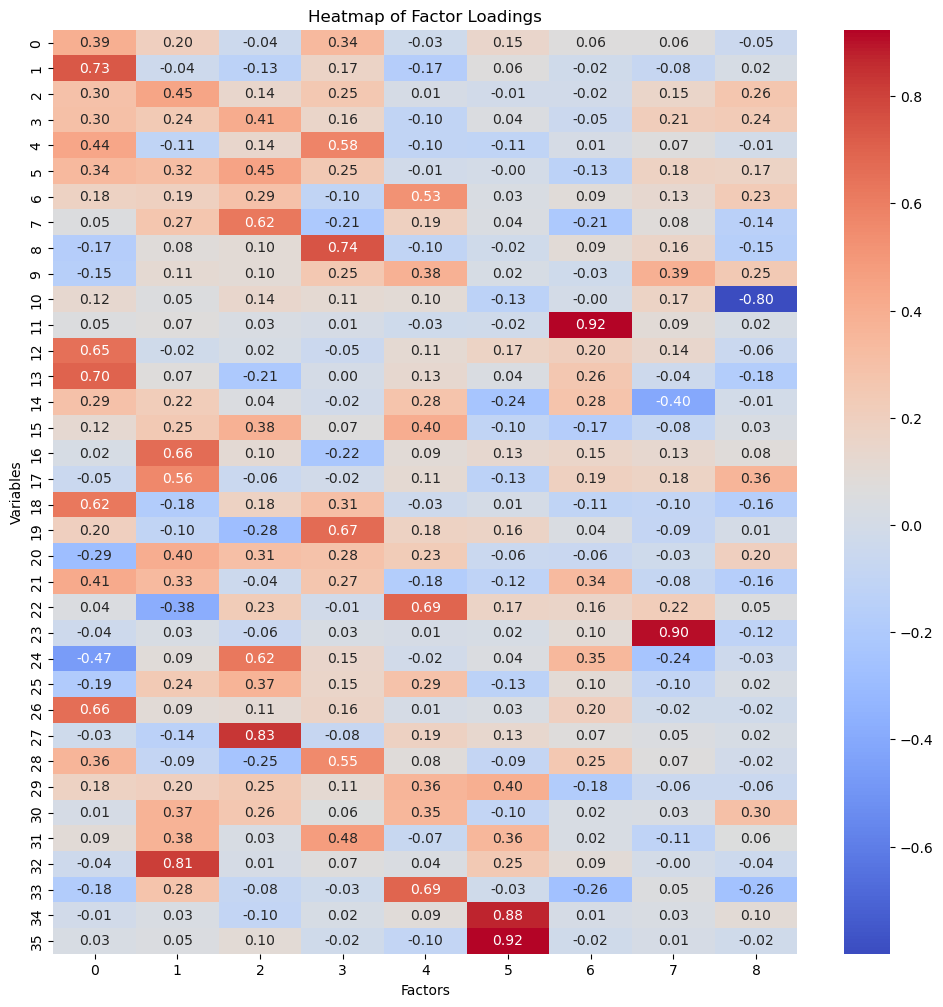

In [65]:
# The factor loadings for the 9 Factors are presented in the form of a heatmap:

fa_2 = FactorAnalyzer(n_factors=9, rotation='oblimin').fit(cluster_1)
loadings = fa_2.loadings_

plt.figure(figsize=(12, 12)) 
sns.heatmap(loadings, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Factor Loadings')
plt.xlabel('Factors')
plt.ylabel('Variables')
plt.show()

In [66]:
corr_mat_factors_1 = pd.DataFrame(fa_2.phi_)
corr_mat_factors_1

# The correlation matrix between the 9 Factors themselves:

,0,1,2,3,4,5,6,7,8
0,1.000000,0.061182,0.092050,0.263798,0.096906,0.111938,0.210347,0.205205,0.339615
1,0.061182,1.000000,0.081375,-0.009281,0.070126,0.202271,0.419473,-0.091493,-0.081720
2,0.092050,0.081375,1.000000,0.122371,0.132298,-0.023819,0.053934,0.109399,0.115489
3,0.263798,-0.009281,0.122371,1.000000,0.246107,-0.016352,-0.020104,0.079568,0.382640
4,0.096906,0.070126,0.132298,0.246107,1.000000,0.036356,0.052378,0.081265,0.111216
5,0.111938,0.202271,-0.023819,-0.016352,0.036356,1.000000,0.226954,0.042936,0.029237
6,0.210347,0.419473,0.053934,-0.020104,0.052378,0.226954,1.000000,-0.022878,0.106851
7,0.205205,-0.091493,0.109399,0.079568,0.081265,0.042936,-0.022878,1.000000,0.157234
8,0.339615,-0.081720,0.115489,0.382640,0.111216,0.029237,0.106851,0.157234,1.000000


## Factor Analysis of the second cluster

In [67]:
# Only the rows belionging to the 2nd cluster are filtered out.

cluster_2 = df.loc[df['Cluster']==1]
cluster_2

,Q 1,Q 2,Q 3,Q 4,Q 5,Q 6,Q 7,Q 8,Q 9,Q 10,...,Q 28,Q 29,Q 30,Q 31,Q 32,Q 33,Q 34,Q 35,Q 36,Cluster
1,4,4,3,2,2,5,2,1,1,3,...,1,4,3,4,3,4,3,3,3,1
14,7,7,6,5,3,4,1,1,3,1,...,1,5,5,1,6,6,1,3,3,1
16,6,6,7,4,3,6,5,3,4,4,...,1,1,1,3,1,3,1,3,1,1
18,7,7,5,5,3,4,1,1,3,1,...,1,5,5,1,6,4,1,4,4,1
29,6,5,6,5,5,6,5,5,4,4,...,4,4,4,3,4,4,4,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,4,7,5,4,6,3,2,1,4,2,...,1,4,2,1,4,2,2,2,2,1
468,5,7,1,1,6,1,1,1,6,1,...,1,5,3,1,4,4,1,3,2,1
469,6,6,5,5,5,5,1,1,5,1,...,1,5,2,1,5,1,1,1,1,1
479,5,7,5,5,7,3,2,1,5,1,...,2,6,2,1,5,2,1,3,2,1


In [68]:
cluster_2 = cluster_2.drop(columns=['Cluster'])
cluster_2

,Q 1,Q 2,Q 3,Q 4,Q 5,Q 6,Q 7,Q 8,Q 9,Q 10,...,Q 27,Q 28,Q 29,Q 30,Q 31,Q 32,Q 33,Q 34,Q 35,Q 36
1,4,4,3,2,2,5,2,1,1,3,...,3,1,4,3,4,3,4,3,3,3
14,7,7,6,5,3,4,1,1,3,1,...,4,1,5,5,1,6,6,1,3,3
16,6,6,7,4,3,6,5,3,4,4,...,3,1,1,1,3,1,3,1,3,1
18,7,7,5,5,3,4,1,1,3,1,...,3,1,5,5,1,6,4,1,4,4
29,6,5,6,5,5,6,5,5,4,4,...,3,4,4,4,3,4,4,4,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,4,7,5,4,6,3,2,1,4,2,...,5,1,4,2,1,4,2,2,2,2
468,5,7,1,1,6,1,1,1,6,1,...,5,1,5,3,1,4,4,1,3,2
469,6,6,5,5,5,5,1,1,5,1,...,5,1,5,2,1,5,1,1,1,1
479,5,7,5,5,7,3,2,1,5,1,...,5,2,6,2,1,5,2,1,3,2


In [69]:
# Next the KMO (Kiaser-Meyer-Olkin) test was used to determine whether the cluster is suitable for factor analysis
# The closer the overall KMO is to 1, the better suited the dataset.

kmo_all, kmo_model = calculate_kmo(cluster_2)

print("KMO per variable:", kmo_all)
print("Overall KMO:", kmo_model)

# Since the cluster has a reasonable KMO value, going ahead with the Factor Analysis

KMO per variable: [0.85598364 0.83830617 0.79304631 0.74465342 0.82182573 0.76923267
 0.828087   0.74899473 0.6714839  0.73421656 0.44881818 0.64176224
 0.77853517 0.82074222 0.527329   0.79434267 0.77481103 0.79313693
 0.88960324 0.77217715 0.77110934 0.90811948 0.7373799  0.4894572
 0.67573225 0.65134775 0.83914248 0.77350429 0.8785327  0.75895265
 0.82653099 0.81465427 0.82018908 0.67199832 0.76033524 0.69781179]
Overall KMO: 0.7737190135345001


/Users/ojas/anaconda3/lib/python3.11/site-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


In [70]:
# The original correlation matrix for the first cluster:
cluster_2.corr()

,Q 1,Q 2,Q 3,Q 4,Q 5,Q 6,Q 7,Q 8,Q 9,Q 10,...,Q 27,Q 28,Q 29,Q 30,Q 31,Q 32,Q 33,Q 34,Q 35,Q 36
Q 1,1.000000,0.672512,0.675901,0.572564,0.713792,0.511301,-0.082318,-0.279547,0.345279,-0.049438,...,0.616398,-0.282795,0.606566,0.410760,-0.155616,0.704668,0.361830,-0.266778,0.447478,0.347831
Q 2,0.672512,1.000000,0.535788,0.445368,0.718797,0.405023,-0.152804,-0.305114,0.319443,-0.101191,...,0.455424,-0.291330,0.678235,0.283608,-0.252523,0.549267,0.249534,-0.271380,0.352806,0.308313
Q 3,0.675901,0.535788,1.000000,0.834789,0.634186,0.791502,0.189630,0.002706,0.304726,0.126311,...,0.487405,-0.139949,0.597626,0.339121,0.007544,0.552306,0.376042,-0.098522,0.407194,0.331997
Q 4,0.572564,0.445368,0.834789,1.000000,0.629711,0.742835,0.149559,0.124032,0.329257,0.198827,...,0.447147,-0.030888,0.539508,0.384086,-0.020771,0.614650,0.295328,-0.077949,0.406529,0.392167
Q 5,0.713792,0.718797,0.634186,0.629711,1.000000,0.511237,-0.036257,-0.201071,0.469449,-0.091877,...,0.696260,-0.165087,0.783065,0.246021,-0.242289,0.673079,0.187661,-0.178485,0.302763,0.260192
Q 6,0.511301,0.405023,0.791502,0.742835,0.511237,1.000000,0.254269,0.146839,0.153053,0.312825,...,0.398997,0.082198,0.513785,0.423902,0.281508,0.426696,0.377591,0.099840,0.315221,0.295162
Q 7,-0.082318,-0.152804,0.189630,0.149559,-0.036257,0.254269,1.000000,0.560724,0.227354,0.492455,...,0.062546,0.298976,-0.184353,0.098445,0.470906,-0.029174,0.157009,0.432034,0.101903,0.024533
Q 8,-0.279547,-0.305114,0.002706,0.124032,-0.201071,0.146839,0.560724,1.000000,0.062898,0.466983,...,-0.118867,0.473164,-0.348653,0.178282,0.498923,-0.112746,0.237776,0.485363,0.087502,0.101346
Q 9,0.345279,0.319443,0.304726,0.329257,0.469449,0.153053,0.227354,0.062898,1.000000,0.091700,...,0.577792,0.080375,0.326242,0.095683,-0.131606,0.395096,0.091169,0.081154,0.091977,0.008078
Q 10,-0.049438,-0.101191,0.126311,0.198827,-0.091877,0.312825,0.492455,0.466983,0.091700,1.000000,...,-0.045473,0.303255,-0.072682,0.044342,0.557202,-0.074089,0.175351,0.308795,-0.013106,-0.029806


In [72]:
# The eigenvalues are calculated for the second cluster

fa_3 = FactorAnalyzer(n_factors=3, rotation='oblimin').fit(cluster_2)
fa_3.loadings_

eigenvalues_2, _ = fa_3.get_eigenvalues()
eigen_values_2 = list(eigenvalues_2)

data_ev = pd.DataFrame(eigen_values_2,columns=['Eigenvalues'])

data_ev

# In this case, since the first 9 eigenvalues are greater than 1, the no. of factors is take to be 9.

,Eigenvalues
0,9.302793
1,7.006668
2,3.239766
3,2.025762
4,1.817829
5,1.580998
6,1.375728
7,1.180228
8,1.039121
9,0.789238


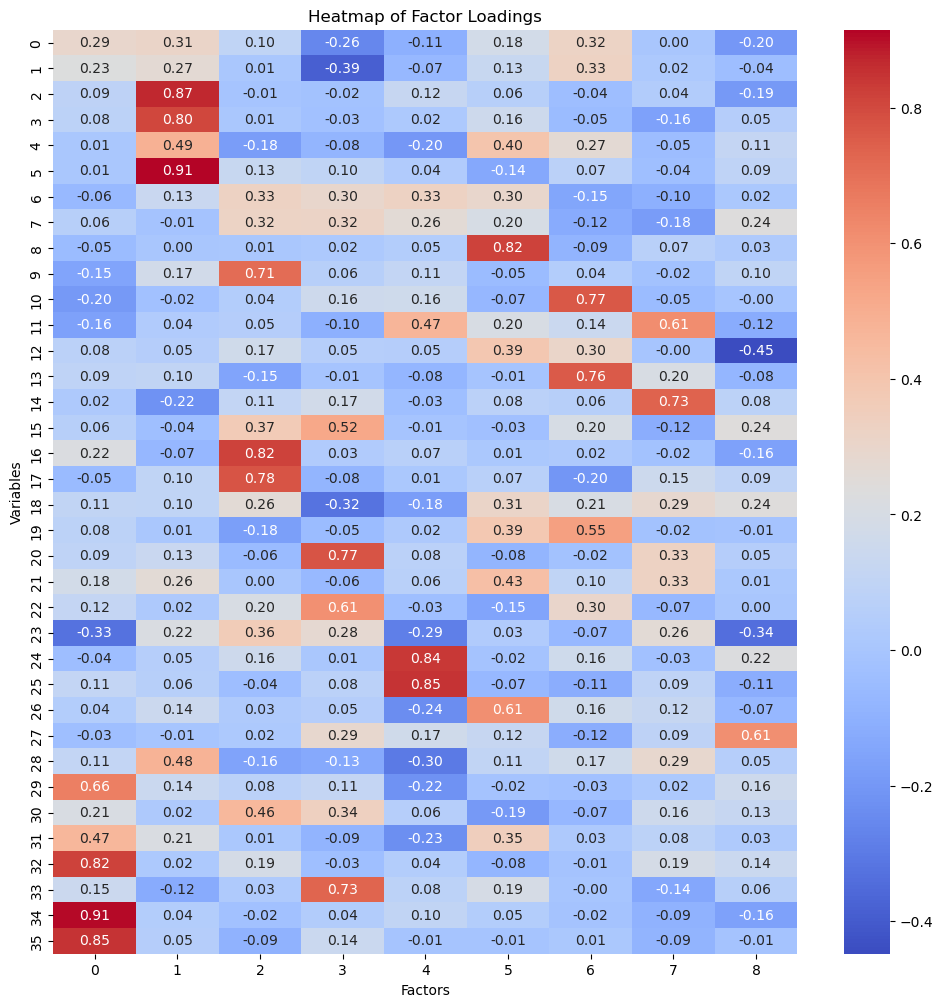

In [75]:
# The factor loadings for the 9 Factors are presented in the form of a heatmap:

fa_4 = FactorAnalyzer(n_factors=9, rotation='oblimin').fit(cluster_2)
loadings_2 = fa_4.loadings_

plt.figure(figsize=(12, 12)) 
sns.heatmap(loadings_2, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Factor Loadings')
plt.xlabel('Factors')
plt.ylabel('Variables')
plt.show()

In [76]:
corr_mat_factors_2 = pd.DataFrame(fa_4.phi_)
corr_mat_factors_2

# The correlation matrix between the 9 Factors themselves:

,0,1,2,3,4,5,6,7,8
0,1.000000,0.173087,0.369402,0.321746,-0.090555,0.175512,-0.072810,0.407973,-0.080718
1,0.173087,1.000000,0.069991,-0.066623,0.244427,0.177656,0.155137,0.041741,0.389982
2,0.369402,0.069991,1.000000,0.153616,-0.071725,-0.008851,0.037008,0.177956,0.100902
3,0.321746,-0.066623,0.153616,1.000000,-0.093224,0.172961,-0.084007,0.300033,-0.071783
4,-0.090555,0.244427,-0.071725,-0.093224,1.000000,-0.001843,0.097173,-0.075917,0.273847
5,0.175512,0.177656,-0.008851,0.172961,-0.001843,1.000000,-0.037217,0.236251,-0.013252
6,-0.072810,0.155137,0.037008,-0.084007,0.097173,-0.037217,1.000000,-0.055078,0.199903
7,0.407973,0.041741,0.177956,0.300033,-0.075917,0.236251,-0.055078,1.000000,-0.165517
8,-0.080718,0.389982,0.100902,-0.071783,0.273847,-0.013252,0.199903,-0.165517,1.000000


In [77]:
# Exporting the relevant data to excel:

corr_mat_factors.to_excel('FA_1_KMediods.xlsx')
corr_mat_factors_2.to_excel('FA_2_KMediods.xlsx')